In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
import evaluate
import tqdm

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-06-25 18:50:01,742] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [26]:

rand_accs_all= []
easy_accs_all = []
easymedium_accs_all = []

# rand_acc = (np.load(f"../ckpts/math_aug_fft_rand9375/test_answer_types5.npy")==0).mean()
# rand_accs_all.append(rand_acc)


for num_epochs in [3, 4, 5]:
    rand_acc = (np.load(f"../ckpts/math_aug_fft_rand10000_{num_epochs}epochs/test_answer_types5.npy")==0)[easy_idxs].mean()
    rand_accs_all.append(rand_acc)

    easy_acc = (np.load(f"../ckpts/math_aug_fft_easy10000_{num_epochs}epochs/test_answer_types5.npy")==0)[easy_idxs].mean()
    easy_accs_all.append(easy_acc)
    
    easymedium_acc = (np.load(f"../ckpts/math_aug_fft_easymedium10000_{num_epochs}epochs/test_answer_types5.npy")==0)[easy_idxs].mean()
    easymedium_accs_all.append(easymedium_acc)

In [25]:
easy_idxs = np.where(test_levels==5)[0]

In [27]:
easymedium_accs_all

[0.026737160120845923, 0.03141993957703928, 0.0324773413897281]

In [28]:
easy_accs_all

[0.027945619335347432, 0.029003021148036254, 0.03262839879154079]

In [29]:
rand_accs_all

[0.024773413897280966, 0.02930513595166163, 0.033987915407854986]

In [73]:
with open('../MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)
with open('../MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)
    
subsample_idxs = np.load("../MATH_aug/rand_50000idxs_hard_subsample.npy")
train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
train_questions = np.array(train_questions)[subsample_idxs][:1000]
train_answers = np.array(train_answers)[subsample_idxs][:1000]

In [123]:



predicted_answers_all = np.load(f"../ckpts/math_aug_fft_rand50000_saveckpts/checkpoint-{str(4000)}/hard_subsample_answers5.npy")

# Load the ROUGE evaluation metric
rouge = evaluate.load('rouge')


rouge1_all = np.ones((len(train_answers), 5))*-1
rouge2_all = np.ones((len(train_answers), 5))*-1
rougeL_all = np.ones((len(train_answers), 5))*-1
rougeLsum_all = np.ones((len(train_answers), 5))*-1
for idx in tqdm.tqdm(range(len(train_answers))):
    predictions =  predicted_answers_all[idx]
    predictions = [prediction[:50] for prediction in predictions]
    references =[train_answers[idx][:50]]
    references = np.repeat(references, 5, axis=0)

    # Compute the ROUGE score
    results = rouge.compute(predictions=predictions, references=references, use_aggregator=False)
    
    rouge1_all[idx] = results['rouge1']
    rouge2_all[idx] = results['rouge2']
    rougeL_all[idx] = results['rougeL']
    rougeLsum_all[idx] = results['rougeLsum']

100%|██████████| 1000/1000 [00:08<00:00, 119.36it/s]


In [125]:
rougeL_all

array([[0.8       , 0.8       , 0.5       , 0.5       , 0.5       ],
       [0.69565217, 1.        , 1.        , 0.48      , 0.66666667],
       [0.2       , 0.28571429, 0.3       , 0.4       , 0.28571429],
       ...,
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.38095238, 0.84210526, 0.7       , 0.76190476],
       [0.        , 0.58823529, 0.77777778, 0.        , 0.        ]])

In [124]:
rougeL_all.mean()

0.7572221869572614

(array([ 65.,  90., 107.,  69.,  71.,  70.,  71.,  70.,  57., 330.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

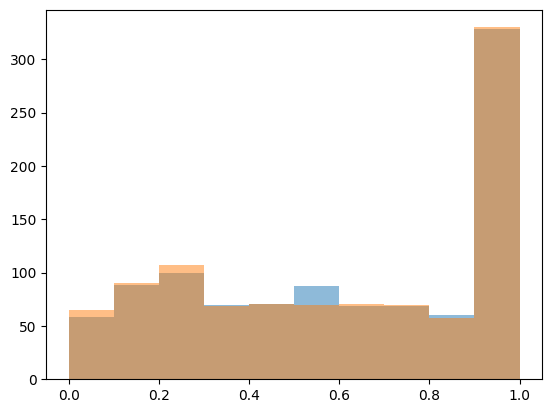

In [129]:
plt.hist(rouge1_all.min(axis=-1), alpha=0.5)
plt.hist(rouge1_all2.min(axis=-1), alpha=0.5)


In [43]:
rouge2_all.mean()

0.49787212829506106

In [37]:
rougeL_all.std()

0.2304615850551728

In [121]:


predicted_answers_all = np.load(f"../ckpts/math_aug_fft_hard50000_saveckpts/checkpoint-{str(4000)}/hard_subsample_answers5.npy")

# Load the ROUGE evaluation metric
rouge = evaluate.load('rouge')


rouge1_all2 = np.ones((len(train_answers), 5))*-1
rouge2_all2 = np.ones((len(train_answers), 5))*-1
rougeL_all2 = np.ones((len(train_answers), 5))*-1
rougeLsum_all2 = np.ones((len(train_answers), 5))*-1
for idx in tqdm.tqdm(range(len(train_answers))):
    predictions =  predicted_answers_all[idx]
    predictions = [prediction[:50] for prediction in predictions]
    references =[train_answers[idx][:50]]
    references = np.repeat(references, 5, axis=0)

    # Compute the ROUGE score
    results = rouge.compute(predictions=predictions, references=references, use_aggregator=False)
    
    rouge1_all2[idx] = results['rouge1']
    rouge2_all2[idx] = results['rouge2']
    rougeL_all2[idx] = results['rougeL']
    rougeLsum_all2[idx] = results['rougeLsum']

100%|██████████| 1000/1000 [00:08<00:00, 116.09it/s]


In [139]:
train_answers_repeated = np.repeat(train_answers, 5, axis=0)

In [181]:
hard_predicted_answers = np.load(f"../ckpts/math_aug_fft_hard50000_saveckpts/checkpoint-{str(1000)}/hard_subsample_answers5.npy").flatten()
hard_true = (np.load(f"../ckpts/math_aug_fft_hard50000_saveckpts/checkpoint-{str(1000)}/hard_subsample_answer_types5.npy")==0).flatten()
hard_true_idxs = np.where(hard_true)[0]
train_answers_repeated_subsampled = train_answers_repeated[hard_true_idxs]
hard_predicted_answers_subsampled = hard_predicted_answers[hard_true_idxs]
results = rouge.compute(predictions=hard_predicted_answers_subsampled, references=train_answers_repeated_subsampled, use_aggregator=False)

In [182]:
rand_predicted_answers = np.load(f"../ckpts/math_aug_fft_rand50000_saveckpts/checkpoint-{str(1000)}/hard_subsample_answers5.npy").flatten()
rand_true = (np.load(f"../ckpts/math_aug_fft_rand50000_saveckpts/checkpoint-{str(1000)}/hard_subsample_answer_types5.npy")==0).flatten()
rand_true_idxs = np.where(rand_true)[0]
train_answers_repeated_subsampled = train_answers_repeated[rand_true_idxs]
hard_predicted_answers_subsampled = hard_predicted_answers[rand_true_idxs]
results_rand = rouge.compute(predictions=hard_predicted_answers_subsampled, references=train_answers_repeated_subsampled, use_aggregator=False)

Text(0, 0.5, 'Frequency')

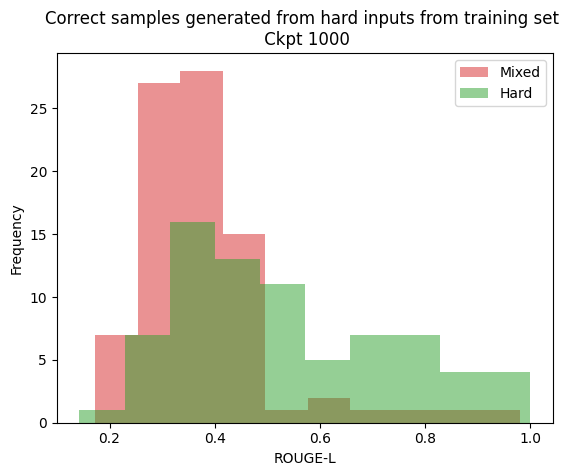

In [183]:
plt.hist(np.array(results_rand['rougeL']), color = "C3", alpha=0.5, label='Mixed')
plt.hist(np.array(results['rougeL']), color = "C2", alpha=0.5, label='Hard')

plt.legend()
plt.title("Correct samples generated from hard inputs from training set \n Ckpt 1000")
plt.xlabel("ROUGE-L")
plt.ylabel("Frequency")

In [155]:
idx = 5
print("train")
print(train_answers_repeated_subsampled[idx])
print("")
print("predicted")
print(hard_predicted_answers_subsampled[idx])

train
 First, we simplify the inequality:
\[(x+3)^2-1<25 \implies (x+3)^2 < 26.\]
Taking the square root of both sides, we get:
\[- \sqrt{26} < x+3 < \sqrt{26}.\]
Subtracting 3 from all sides, we have:
\[-3 - \sqrt{26} < x < \sqrt{26} - 3.\]
The integer solutions to this inequality are the integers in the interval $(-3 - \sqrt{26}, \sqrt{26} - 3)$.
We can approximate the values of $\sqrt{26}$:
\[\sqrt{26} \approx 5.099,\]
so the interval is approximately $(-8.099, 2.099)$.
The integer solutions in this interval are $-7, -6, -5, -4, -3, -2, -1, 0, 1$.
The sum of these integer solutions is $-7 - 6 - 5 - 4 - 3 - 2 - 1 + 0 + 1 = -21$. The answer is: $-21$

predicted
 First, we simplify the inequality:
\[(x+3)^2-1<25 \implies (x+3)^2 < 26.\]
Taking the square root of both sides, we get:
\[- \sqrt{26} < x+3 < \sqrt{26}.\]
Subtracting 3 from all parts of the inequality, we have:
\[-3 - \sqrt{26} < x < \sqrt{26} - 3.\]
The integer solutions to this inequality are the integers in the interval $

In [138]:
rand_true = (np.load(f"../ckpts/math_aug_fft_hard50000_saveckpts/checkpoint-{str(checkpoint)}/hard_subsample_answer_types5.npy")==0).flatten()

In [66]:
for checkpoint in [1000, 2000, 3000, 4000]:
    print((np.load(f"../ckpts/math_aug_fft_rand50000_saveckpts/checkpoint-{str(checkpoint)}/easymedium_subsample_answer_types5.npy")==0).mean())

0.1236
0.2364
0.3684
0.5258


In [133]:
idx=12
train_answers[idx][:150]

' The first eight positive integers in binary form are:\n1 = 1\n2 = 10\n3 = 11\n4 = 100\n5 = 101\n6 = 110\n7 = 111\n8 = 1000\n\nTo find the least positive intege'

In [134]:
np.load(f"../ckpts/math_aug_fft_rand50000_saveckpts/checkpoint-{str(4000)}/hard_subsample_answers5.npy")[idx]

array([' The first eight positive integers are $1, 2, 3, 4, 5, 6, 7, 8$.\nTo find the least positive integer that is divisible by each of these integers, we need to find the least common multiple (LCM) of these numbers.\nThe prime factorization of each number is:\n$1 = 1$,\n$2 = 2$,\n$3 = 3$,\n$4 = 2^2$,\n$5 = 5$,\n$6 = 2 \\cdot 3$,\n$7 = 7$,\n$8 = 2^3$.\nThe LCM is the product of the highest powers of all prime factors: $2^3 \\cdot 3 \\cdot 5 \\cdot 7 = 840$.\nNow, we need to find the sum of the digits of 840 in binary form.\n$840 = 110011100$.\nThe sum of the digits is $1+1+0+0+1+1+1+0+0 = 4$.\nTherefore, the least positive integer divisible by each of the first eight positive integers, with the sum of their digits added to the final answer, is $840 + 4 = 844$. The answer is: $844$',
       ' The first eight positive integers in binary form are: 1, 10, 100, 1000, 10000, 100000, 1000000.\nTo find the least positive integer that is divisible by each of these numbers, we need to find th

In [135]:
np.load(f"../ckpts/math_aug_fft_hard50000_saveckpts/checkpoint-{str(4000)}/hard_subsample_answers5.npy")[idx]

array([' The first eight positive integers in binary form are:\n1 = 1\n2 = 10\n3 = 11\n4 = 100\n5 = 101\n6 = 110\n7 = 111\n8 = 1000\n\nTo find the least positive integer divisible by these numbers, we can take their least common multiple (LCM).\nThe LCM of these numbers is 11111000, which is equal to 252 in decimal form.\n\nNow, we need to find the sum of the digits of 252. The digits are 2, 5, and 2, so their sum is 9.\n\nTherefore, the least positive integer divisible by each of the first eight positive integers, with the sum of their digits added to the final answer, is 9. The answer is: $9$',
       ' The first eight positive integers in binary form are:\n1 = 1\n2 = 10\n3 = 11\n4 = 100\n5 = 101\n6 = 110\n7 = 111\n8 = 1000\n\nTo find the least positive integer divisible by these numbers, we can take their least common multiple (LCM).\nThe LCM of these numbers is 111110100, which is equal to 252 in decimal form.\n\nNow, we need to find the sum of the digits of 252. The digits are 2, 

In [65]:
for checkpoint in [1000, 2000, 3000, 4000]:
    print((np.load(f"../ckpts/math_aug_fft_hard50000_saveckpts/checkpoint-{str(checkpoint)}/hard_subsample_answer_types5.npy")==0).mean())

0.015
0.0234
0.0642
0.143


In [2]:
(np.load("../ckpts/math_aug_fft_rand50000_saveckpts/test_answer_types5.npy")==0).mean()

0.20064

In [3]:
(np.load("../ckpts/math_aug_fft_hard50000_saveckpts/test_answer_types5.npy")==0).mean()

0.17716

In [10]:
rand_idxs = np.load("../MATH_aug/rand_50000idxs.npy")#[:20646]# == np.load("../MATH_aug/rand_50000idxs_hard.npy")

In [11]:
hard_idxs = (np.load("../MATH_aug/rand_50000idxs_hard.npy"))

In [13]:
np.save("../MATH_aug/rand_50000idxs_hard_subsample.npy", np.random.choice(hard_idxs, 2000, replace=False))

In [16]:
remaining_elements = np.setdiff1d(rand_idxs, hard_idxs)


In [18]:

np.save("../MATH_aug/rand_50000idxs_easymedium_subsample.npy", np.random.choice(remaining_elements, 2000, replace=False))

In [3]:
train_part1_accs = (np.load("../ckpts/math_aug_fft_full/train_part1_answer_types5.npy")==0).sum(axis=-1)
train_part2_accs = (np.load("../ckpts/math_aug_fft_full/train_part2_answer_types5.npy")==0).sum(axis=-1)
train_accs = np.concatenate([train_part1_accs, train_part2_accs])
subsample_idxs = np.where(train_accs>=0)[0]
subsample_idxs = np.random.choice(subsample_idxs, size=50000, replace=False)


In [12]:
np.save("../MATH_aug/rand_50000idxs_hard.py", subsample_idxs[np.where(train_accs[subsample_idxs]==0)[0]])


In [14]:
hard_idxs1 = (subsample_idxs[np.where(train_accs[subsample_idxs]==0)[0]])

In [15]:
hard_idxs_all = np.where(train_accs==0)[0]


In [16]:
remaining_elements = np.setdiff1d(hard_idxs_all, hard_idxs1)


In [17]:
additional_samples = np.random.choice(remaining_elements, 50000-len(hard_idxs1), replace=False)


In [26]:
hard_idxs1

array([ 40987, 119306,  97723, ...,  17155, 131171,  59343])

In [28]:
119306 in hard_subsample_idxs

True

In [20]:
hard_subsample_idxs = np.concatenate([hard_idxs1, additional_samples])

In [24]:
train_accs[hard_subsample_idxs].sum()

0

In [23]:
np.save("../MATH_aug/hard_50000idxs.py", hard_subsample_idxs)

In [4]:
np.save("../MATH_aug/rand_50000idxs.py", subsample_idxs)

In [19]:
all_accs = []
for data_type in ["easy", "medium", "hard", "easymedium", "rand"]:
    data_type_accs = []
    for num_train_points in [3125, 6250, 9375, 12500,18750, 25000, 37500, 50000]:
        try:
            path = f"../ckpts/math_aug_fft_{data_type}{str(num_train_points)}/test_answer_types5.npy"
            acc = (np.load(path)==0).mean(axis=-1)
            data_type_accs.append(acc)
        except:
            # data_type_accs.append(0)
            print(data_type)
            print(num_train_points)
    all_accs.append(data_type_accs)
# all_accs = np.array(all_accs)

medium
37500
medium
50000


In [16]:
from datasets import load_dataset
dataset = load_dataset("hendrycks/competition_math")
levels = dataset["test"]["level"]

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [4]:
all_accs

[[array([0.6, 0.6, 0. , ..., 0. , 0. , 0. ]),
  array([0.8, 0.8, 0. , ..., 0. , 0. , 0. ]),
  array([1. , 0.2, 0. , ..., 0. , 0. , 0. ]),
  array([1., 1., 0., ..., 0., 0., 0.]),
  array([0.8, 1. , 0. , ..., 0. , 0. , 0. ]),
  array([1. , 0.4, 0. , ..., 0. , 0. , 0. ])],
 [array([0.8, 0.6, 0. , ..., 0. , 0. , 0. ]),
  array([0.8, 0.4, 0. , ..., 0. , 0. , 0. ]),
  array([0.8, 0.2, 0. , ..., 0. , 0. , 0. ]),
  array([0.4, 0.6, 0. , ..., 0. , 0. , 0. ])],
 [array([1., 1., 0., ..., 0., 0., 0.]),
  array([0.8, 0.4, 0. , ..., 0. , 0. , 0. ]),
  array([1., 0., 0., ..., 0., 0., 0.]),
  array([1. , 0.4, 0. , ..., 0. , 0. , 0. ]),
  array([0. , 0.8, 0. , ..., 0. , 0. , 0. ]),
  array([1. , 0.6, 0.2, ..., 0. , 0. , 0. ])],
 [array([0.6, 0. , 0. , ..., 0. , 0. , 0. ]),
  array([0.6, 0.4, 0. , ..., 0. , 0. , 0. ]),
  array([1. , 0.2, 0. , ..., 0. , 0. , 0. ]),
  array([1. , 0.4, 0. , ..., 0. , 0. , 0. ]),
  array([1. , 0.6, 0. , ..., 0. , 0. , 0. ]),
  array([1., 1., 0., ..., 0., 0., 0.])],
 [array(

Text(0.5, 0, 'Num train examples')

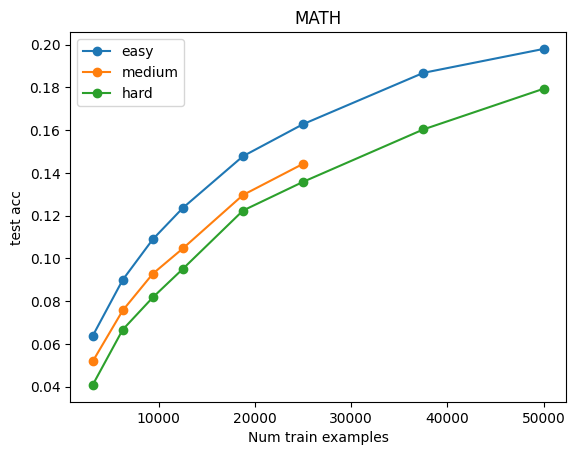

In [37]:
for i in [0, 1, 2]:
    if len(all_accs[i])==8:
        plt.plot([3125, 6250,9375, 12500, 18750, 25000, 37500, 50000], np.array(all_accs[i]).mean(axis=-1), "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][i])
    else:
        plt.plot([3125, 6250,9375, 12500,18750, 25000], np.array(all_accs[i]).mean(axis=-1), "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][i])

plt.legend()
# plt.ylim(0.1, 0.4)
plt.ylabel("test acc")
plt.title("MATH")
plt.xlabel("Num train examples")

Text(0.5, 0, 'Num train examples')

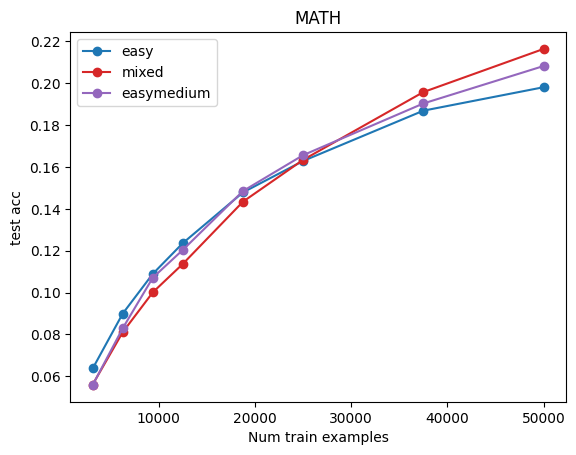

In [34]:
plt.plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], np.array(all_accs[0]).mean(axis=-1), "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][0])
plt.plot([3125, 6250,9375,  12500,18750, 25000, 37500, 50000], np.array(all_accs[4]).mean(axis=-1), "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][4], c="C3")
plt.plot([3125, 6250,9375,  12500,18750, 25000, 37500, 50000], np.array(all_accs[3]).mean(axis=-1), "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][3], c = "C4")


plt.legend()
# plt.ylim(0.1, 0.4)
plt.ylabel("test acc")
plt.title("MATH")
plt.xlabel("Num train examples")

Text(0.5, 0, 'Num train examples')

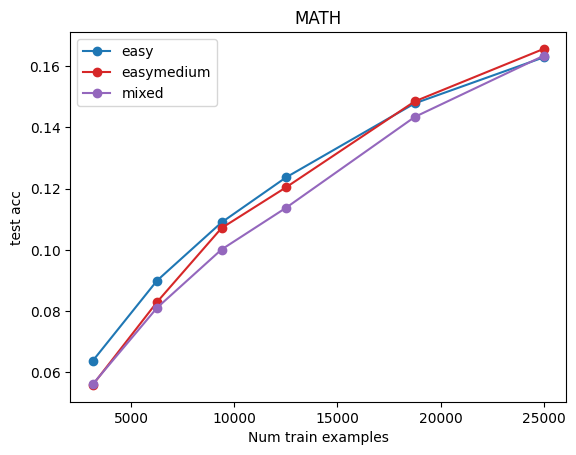

In [36]:
plt.plot([ 3125, 6250,9375, 12500, 18750, 25000, ], np.array(all_accs[0]).mean(axis=-1)[:6], "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][0])
plt.plot([ 3125, 6250,9375, 12500, 18750, 25000, ], np.array(all_accs[3]).mean(axis=-1)[:6], "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][3], c = "C3")
plt.plot([ 3125, 6250,9375, 12500, 18750, 25000, ], np.array(all_accs[4]).mean(axis=-1)[:6], "o-",label =  ["easy", "medium", "hard", "easymedium", "mixed"][4], c="C4")


plt.legend()
# plt.ylim(0.1, 0.4)
plt.ylabel("test acc")
plt.title("MATH")
plt.xlabel("Num train examples")

In [7]:
np.array(all_accs[0]).mean(axis=-1)

array([0.04516, 0.06376, 0.09   , 0.12364, 0.16284, 0.18684, 0.19804])

In [8]:
np.array(all_accs[3]).mean(axis=-1)

array([0.0442 , 0.05592, 0.083  , 0.1204 , 0.1656 , 0.19028, 0.20816])

In [9]:
np.array(all_accs[4]).mean(axis=-1)

array([0.0412 , 0.05612, 0.08112, 0.11372, 0.16336, 0.19572, 0.21632])

In [17]:
test_levels = np.array([int(level[-1]) for level in dataset["test"]['level']])

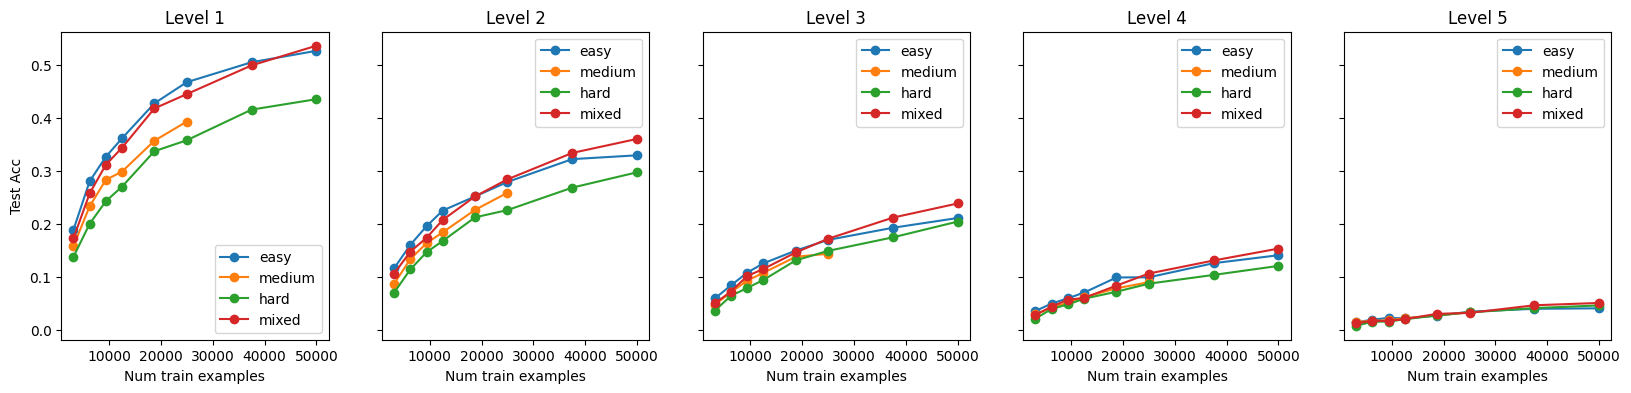

In [22]:
# make 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i in range(5):
    level_idxs = np.where(test_levels == i+1)[0]

    # axs[i].plot(num_points_all, np.mean(test_pass_5s_1[:, level_idxs], axis=1), "o-", label="rand")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], (np.array(all_accs[0])[:, level_idxs]).mean(axis=-1), "o-",label =  "easy")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000], (np.array(all_accs[1])[:, level_idxs]).mean(axis=-1), "o-",label =  "medium")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], (np.array(all_accs[2])[:, level_idxs]).mean(axis=-1), "o-",label =  "hard")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], (np.array(all_accs[4])[:, level_idxs]).mean(axis=-1), "o-",label =  "mixed", c="C3")

    # axs[i].plot(num_points_all, np.mean(test_pass_5s_2[:, level_idxs], axis=1), "o-", label="subsample")
    
    axs[i].set_title(f"Level {i+1}")
    axs[i].set_xlabel("Num train examples")
    if i == 0:
        axs[i].set_ylabel("Test Acc")
    axs[i].legend()

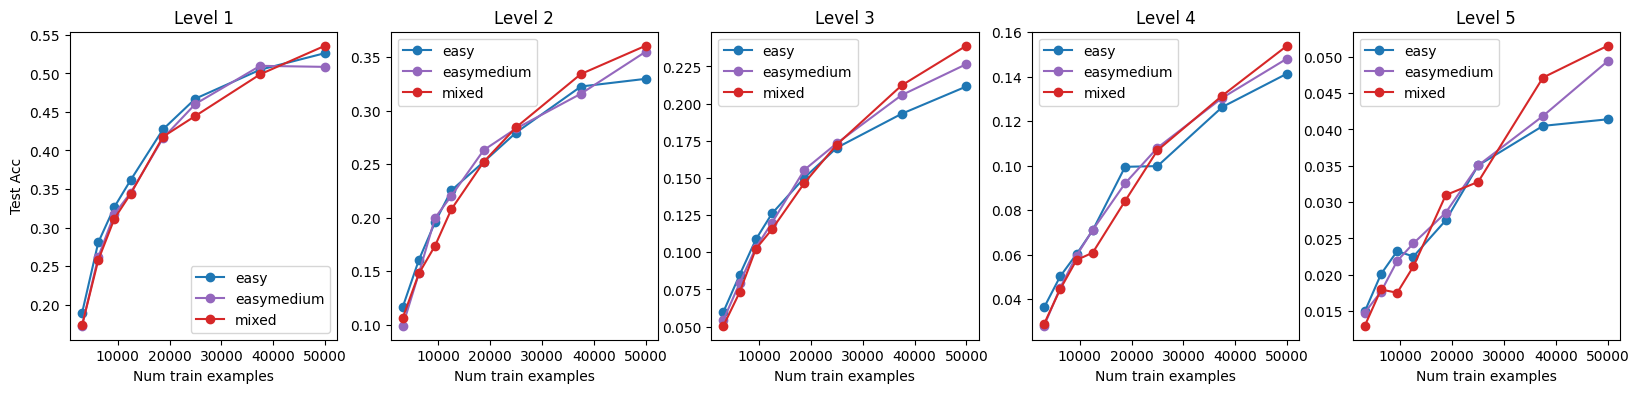

In [61]:
# make 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    level_idxs = np.where(test_levels == i+1)[0]

    # axs[i].plot(num_points_all, np.mean(test_pass_5s_1[:, level_idxs], axis=1), "o-", label="rand")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], (np.array(all_accs[0])[:, level_idxs]).mean(axis=-1), "o-",label =  "easy")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], (np.array(all_accs[3])[:, level_idxs]).mean(axis=-1), "o-",label =  "easymedium", c="C4")
    axs[i].plot([ 3125, 6250, 9375, 12500,18750, 25000, 37500, 50000], (np.array(all_accs[4])[:, level_idxs]).mean(axis=-1), "o-",label =  "mixed", c="C3")

    # axs[i].plot(num_points_all, np.mean(test_pass_5s_2[:, level_idxs], axis=1), "o-", label="subsample")
    
    axs[i].set_title(f"Level {i+1}")
    axs[i].set_xlabel("Num train examples")
    if i == 0:
        axs[i].set_ylabel("Test Acc")
    axs[i].legend()

In [39]:
gsm8k_acc = np.load("../ckpts/gsm8k_aug_fft_full/train_part1_answer_types5.npy")==0
gsm8k_acc2 = np.load("../ckpts/gsm8k_aug_fft_full/train_part1_answer_types5_seed3.npy")==0

In [41]:
gsm8k_acc

array([[ True,  True,  True,  True,  True],
       [False, False, False, False, False],
       [ True,  True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [51]:
(np.abs(gsm8k_acc.sum(axis=-1)-gsm8k_acc2.sum(axis=-1))>1).mean()

0.11905760893059211

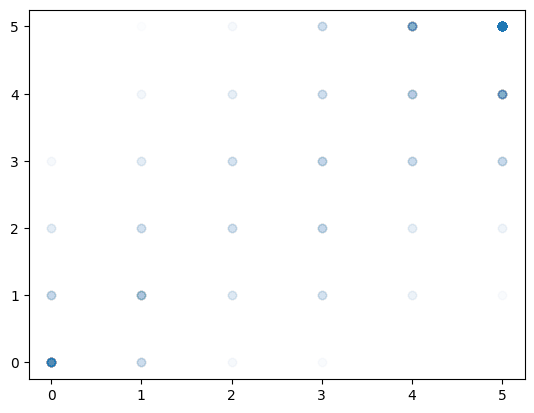

In [52]:
plt.scatter(gsm8k_acc.sum(axis=-1)[:1000], gsm8k_acc2.sum(axis=-1)[:1000], alpha=0.01)

(array([11436.,     0.,  6746.,     0.,  6472.,     0.,  7046.,     0.,
         9533., 37418.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

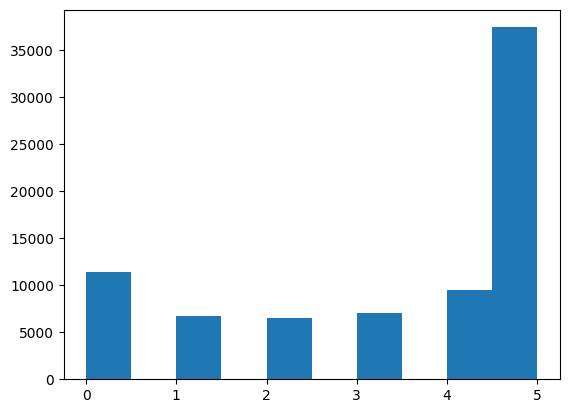

In [14]:
plt.hist(gsm8k_acc.sum(axis=-1))